# * 단순선형 회귀분석
## 1) 자동차 배기량과 연비 회귀분석

다음과 같이 자동차 배기량에 따른 연비 데이터가 있다고 가정해보자. 자동차 배기량과 연비의 인과관계가 존재히는지 회귀분석을 통해 회귀힘수를 구해보자. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

* X : 배기량
* Y : 연비 

In [16]:

# X는 자동차 배기량, y는 연비
X = np.array([ 1 , 1.4 , 1.6 , 2 , 2.2 , 2.4 , 3 , 3.3 , 3.6 ])
y = np.array([ 15 , 13 , 13 , 12 , 11 , 10.5 , 10 , 9 , 8 ])

# 상수 추가 y절편 추가
X_with_const = sm.add_constant(X)

# 모델 훈련 
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.97e-06
Time:                        15:51:51   Log-Likelihood:                -3.9965
No. Observations:                   9   AIC:                             11.99
Df Residuals:                       7   BIC:                             12.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8291      0.414     40.626      0.0

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


* 독립변수가 1개일 때, ' R-squared ' 를 보기 
* 독립변수가 2개 이상일 때, ' Adj. R-squared ' 를 보기
* Df : Degree of freedom 
* const (상수) 부분 중요하게 보기 
* 16.8291 : y 종속변수
* -2.4371 : 마이너스 이기 때문에 음의 상관관계를 가짐 



* 결론 : 96.7% 의 설명력을 갖는다. 

* value 의 값이 1.97e-06으로，유의수준 0.05 에서 회귀분석의 귀무기설을 기각한다. 
* 따라서 '모든 회귀계수는 0 이다’라고 할 수 없으므로 주어진 모형은 통계적으로 유의하다. 
* 모형이 유의하면 각 회귀계수에 대한 p-value 를 확인해야 한다. X의 회귀계수 p-value는 1.97e-06으로 독립변수 X에 대한 귀무가설을 기각한다. 따라서 X의 회귀계수는 -2.4371 일 것으로 추정가능하다. 
* 상수항의 추정치는 16.829 이다.
* 추정되는 회귀식 : y(연비) = {- 2.4371 * (배기량X)} + 16.8291

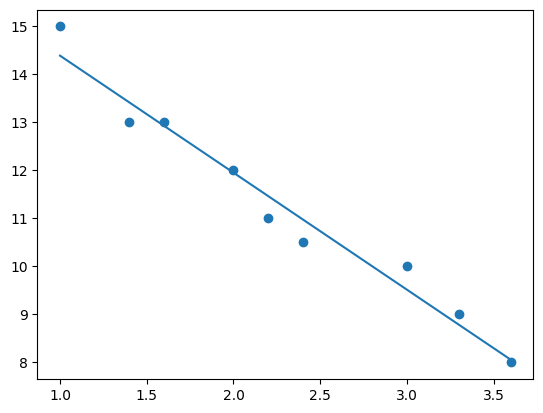

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

* 위 그래프는 최소제곱법을 이용하여 회귀모형을 설명함(?)
* 배기량이 높을수록 연비가 낮음 
* 배기량이 낮을수록 연비가 높음

* R-squared : 0.967 로 약 96.7% 설명한다.
* Prob (F-statistic) : 1.97e-06 로 매우 작기 때문에 0.001 이하이므로 통계적으로 유의미하다. 
* x의 회귀계수는 -2.4371  이고
* 상수항(y절편) 16.8291 이다. 
<br><br>
* 따라서 추정되는 회귀식은 

###    y(연비) = { - 2.4371 * (배기량X) } + 16.8291

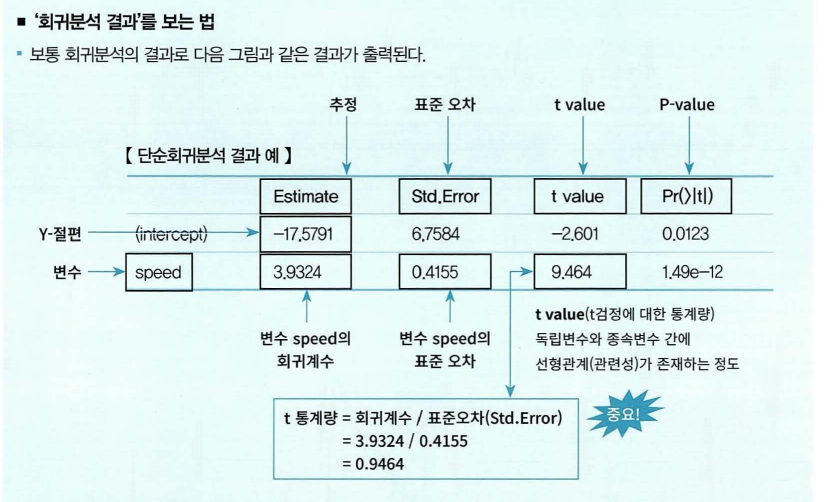

 < 단순 회귀분석 > 결과 보는 법 - R studio ver.

# * 단순선형회귀분석에 대한 ANOVA 분산 분석

In [18]:
from statsmodels.formula.api import ols

In [19]:

# X는 자동차 배기량, y는 연비
X = np.array([ 1 , 1.4 , 1.6 , 2 , 2.2 , 2.4 , 3 , 3.3 , 3.6 ])
y = np.array([ 15 , 13 , 13 , 12 , 11 , 10.5 , 10 , 9 , 8 ])

data = pd.DataFrame(dict(X=X, y=y))
model = ols('y ~ X', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ = 2)


print(anova_table)

             sum_sq   df           F    PR(>F)
X         37.274792  1.0  203.725066  0.000002
Residual   1.280763  7.0         NaN       NaN


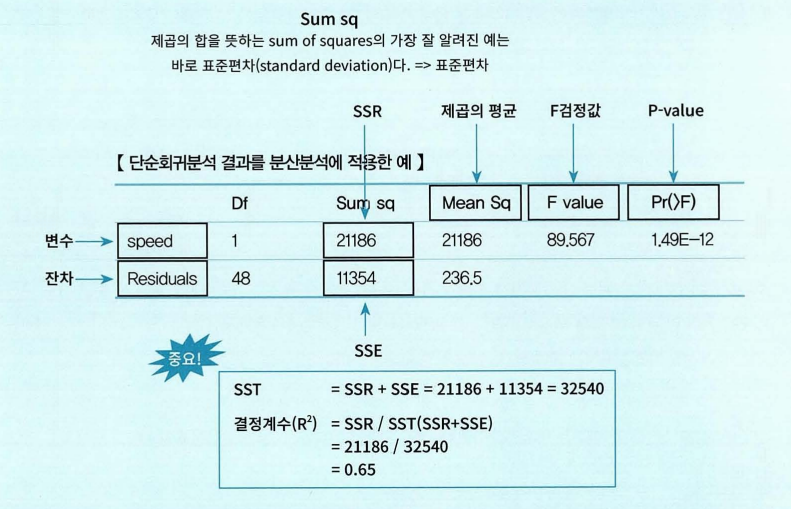

< 단순선형회귀분석에 대한 ANOVA 분산 분석 > 결과 보는 법 - R studio ver.

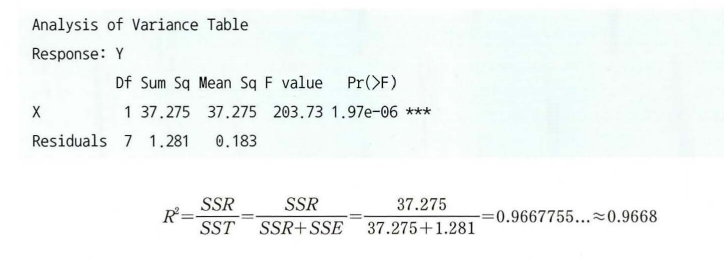

## Q-Q Plot 그리기

In [22]:
# R의 ggplot 이라는 시각화 라이브러리를 python에서 쓸 수 있게 해줌

# !pip install plotnine

In [23]:
import scipy.stats as stats
from plotnine import ggplot, aes, stat_qq, stat_qq_line, labs

In [24]:
X

array([1. , 1.4, 1.6, 2. , 2.2, 2.4, 3. , 3.3, 3.6])

In [25]:
y

array([15. , 13. , 13. , 12. , 11. , 10.5, 10. ,  9. ,  8. ])

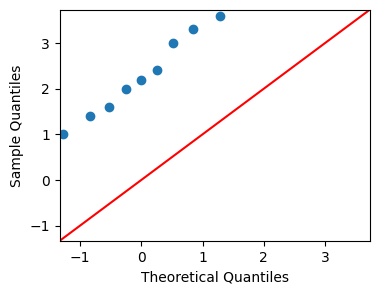

In [27]:
# QQ Plot 생성
plt.figure(figsize = (4,3))
sm.qqplot(X, line = '45', ax = plt.gca(), label='x')
plt.show()

# * 다중선형회귀분석
*  독립변수가 2개 이상이고 종속변수가 하나일 때 사용 가능한 회귀분석으로 독립변수와 종속변수의 관계가 선형으로 표현된다. 단순회귀분석이 확장된 형태로 기본적인 회귀계수 및 통계적 유의성 검 증 등은 단순회귀분석과 같다. 독립변수가 여러 개이므로 회귀계수도 여러개다. 

예제 : 다음과같이 l0개 의 가구에 대하여 마당면적 집 면적 주차대수 가장 가까운 편의점까지의 거리, 집 가격 등의 데이터가 주어져 있다. 주어진 변수에 따른 집 가격의 추정식을 구해보자.

In [28]:
# 데이터
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 독립 변수와 종속 변수 설정
X = np.column_stack((yard, area, park, dist))
y = price

# 상수 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.07
Date:                Tue, 27 Aug 2024   Prob (F-statistic):            0.00627
Time:                        16:44:29   Log-Likelihood:                -75.420
No. Observations:                  10   AIC:                             160.8
Df Residuals:                       5   BIC:                             162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3045.6891   4084.218      0.746      0.4

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10


* Adj. R-squared: 독립변수가 4개 이니 다중선형회귀분석이므로, ' Adj. R-squared ' 결과를 봐야함! 
* Adj. R-squared : 0.853 즉, 85.3 % 의 설명력을 갖는다. 

* 회귀식 

price = 3045.689 + (117 .922 * x1) + (230 .563 * x2) + (436.801 * x3) + (- 16 .446 * x4) 

* p-value 값이 0.006267 이므로 유의수준 0.05 에서 기각 귀무가설을 기각한다. 
* 따라서 위 추정식은 통계적으로 유의하다고 볼 수 있다. 
* 각 독립변수에 대한 p-value 값을 유의수준 0.05 이내에서 비교해보면, X1(yard)를 제외한 나머지 변수는 통계적으로 유의하다. 
* 이 경우 X1(yard)를 제외한 나머지 개를 독립변수로 회귀분석을 재수행할 것을 권장한다.
<br><br>
--> 즉, 최적회귀방정식으로 다시 재수행하기

# * 최적 회귀방정식 
* 1개의 반응변수 y를 설명하기 위한 k개의 독립변수 후보들이 있을 때 반응변수 y를 가장잘 설명할 수 있는 회귀식을 찾는 이 최적 회귀방정식의 목표다. 


In [29]:
# 데이터
# yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 독립 변수와 종속 변수 설정
X = np.column_stack((area, park, dist))
y = price

# 상수 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     12.92
Date:                Tue, 27 Aug 2024   Prob (F-statistic):            0.00499
Time:                        17:18:00   Log-Likelihood:                -77.902
No. Observations:                  10   AIC:                             163.8
Df Residuals:                       6   BIC:                             165.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9242.3046   2545.393      3.631      0.0

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10


< 최적의 회귀방정식을 도출하기 위한 방법 >
* 변수선택법 :  부분집합법  vs  단계적 변수선택법

<br><br>
< 단계적 변수선택법 3가지 > 
* 말그대로 일정한 단계를 거치면서 변수를 추가하거나 혹은 제거하는 방식으로 최적의 회귀방정식을 도출하는 방식
1) 전진선택법 : 모든 독립변수 가운데 기준 통계치에 가장 많은 영향을 줄 것으로 판단되는 변수부터 하나씩 추가하면서 모형을 선택
2) 후진제거법 : 독립변수를 모두 포함하여 가장 적은 영향을 주는 변수부터 하나씩 제거하는 방법
3) 단계별 방법 : 전진선택법과 후진제거법을 보완한 방법

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [31]:

# 데이터 생성
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
popul = np.array([4412, 2061, 4407, 1933, 4029, 4180, 3444, 1683, 3020, 4459])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 데이터프레임 생성
data = pd.DataFrame({'yard': yard, 'area': area, 'park': park, 'dist': dist, 'popul': popul, 'price': price})

# 독립 변수와 종속 변수 설정
X = data[['yard', 'area', 'park', 'dist', 'popul']]
y = data['price']

# 전진 선택법을 사용한 회귀 분석
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
sfs.fit(X, y)

# 선택된 변수
selected_features = X.columns[sfs.get_support()]

# 최종 모델 적합
X_selected = sm.add_constant(data[selected_features])
final_model = sm.OLS(y, X_selected).fit()

# 요약 출력
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.8433
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.470
Time:                        17:39:43   Log-Likelihood:                -86.871
No. Observations:                  10   AIC:                             179.7
Df Residuals:                       7   BIC:                             180.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+04   3990.829      3.056      0.0

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
